<a href="https://colab.research.google.com/github/j-winfield/fastaidl/blob/pet-classification/petclassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate


In [0]:
bs=64

In [5]:
path =untar_data(URLs.PETS);path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [6]:
path.ls()


[PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images')]

In [0]:
path_anno=path/'annotations'
path_image=path/'images'

In [0]:
fnames=get_image_files(path_image)

In [9]:
fnames[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/havanese_132.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_254.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/wheaten_terrier_36.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/basset_hound_122.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/pug_193.jpg')]

In [0]:
np.random.seed(2)
              

In [0]:
pat=r'/([^/]+)_\d+.jpg$'

In [0]:
data=ImageDataBunch.from_name_re(path_image,fnames,pat,ds_tfms=get_transforms(),size=224,bs=bs).normalize(imagenet_stats)

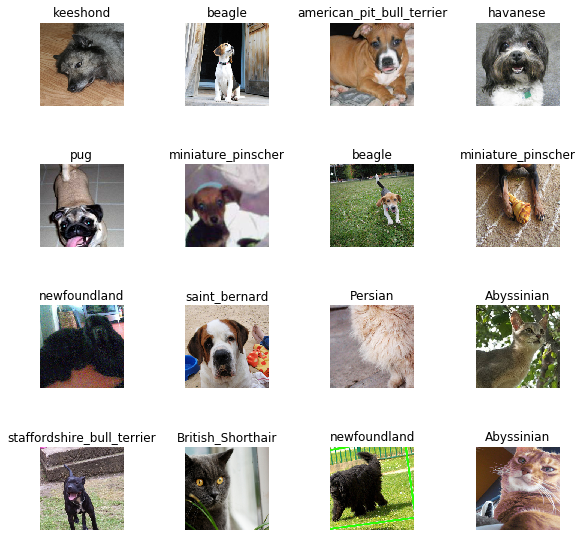

In [13]:
data.show_batch(figsize=(8,8),rows=4)

In [14]:
learn=cnn_learner(data,models.resnet34,metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:00<00:00, 117875141.81it/s]


In [15]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [16]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.393221,0.359343,0.123139,01:47
1,0.539612,0.257200,0.084574,01:45
2,0.340369,0.239659,0.082544,01:45
3,0.252725,0.222444,0.073072,01:46


In [0]:
learn.save('stage1')

In [0]:
interp=ClassificationInterpretation.from_learner(learn)
losses,idxf